In [ ]:
import numpy as np
import matplotlib.pyplot as plt


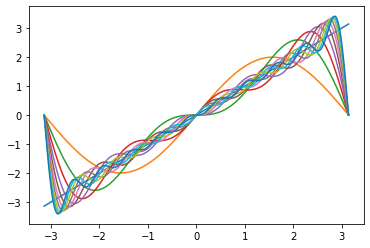

In [182]:
"""
    Given a function we're going to calculate
    the Fourier coefficients of the Fourier Series
"""

#Defining the domain
L = np.pi
dx = L/1000
x = L * np.linspace(-1,1, 1000)
n = len(x)
n_quartiles = int(np.floor(n/4))

#Defining the function
y = np.zeros_like(x)
y= x

#Plotting the function
plt.plot(x, y)

#Computing the Fourier Series
a_0 = np.sum(y*np.ones_like(x)*dx)/L
fourier_series = a_0

A=np.zeros(10)
B=np.zeros(10)

for i in range(10):
    A[i] = (2/L) * (np.sum(y*np.cos(np.pi*(i+1)*x/L) * dx))
    B[i] = (2/L) *(np.sum(y*np.sin(np.pi*(i+1)*x/L) * dx))
    fourier_series += A[i]*np.cos(np.pi*(i+1)*x/L) + B[i]*np.sin(np.pi*(i+1)*x/L)
    plt.plot(x,fourier_series)




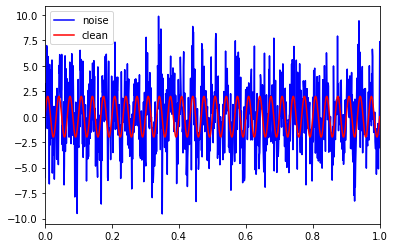

In [147]:
"""
    We're going to use the Fourier Transform to
    derive a signal that we've masked with white noise.
"""
    

# Define the domain and functions we're working with
dx = 1/1000
x = np.linspace(0,1,1000)
f_clean = 2 * np.sin(2*np.pi*30*x)
f = 2 * np.sin(2*np.pi*30*x)

#Add in random noise and plot the data
f += 3 * np.random.randn(len(x))
plt.plot(x,f,'b', label = 'noise')
plt.plot(x,f_clean,'r',label = 'clean')
plt.xlim(x[0],x[-1])
plt.legend()



C:\Users\Alexa\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


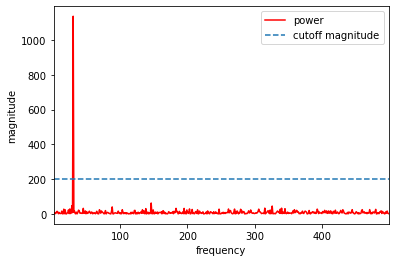

In [180]:
#Fourier Transform Calculation
n = len(x)
fft = np.fft.fft(f,n)
power = fft * np.conj(fft) / n
freq = 1/(n * dx) * np.arange(n)
L = np.arange(1,np.floor(n/2), dtype='int')
cutoff = 200 * np.ones_like(L)

plt.plot(L,power[L],'r', label='power')
plt.plot(L, cutoff,'--', label='cutoff magnitude')
plt.xlim(L[0],L[-1])
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.legend()

C:\Users\Alexa\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.legend(*args, **kwargs)>

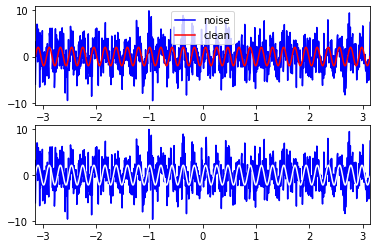

In [181]:
threshold_index = power
for i,freq in enumerate(power):
    if freq < 200:
        threshold_index[i] = 0
    else:
        threshold_index[i] = 1
power_clean = threshold_index * power
fft = threshold_index * fft
ifft = np.fft.ifft(fft)

fig, axs = plt.subplots(2)

plt.sca(axs[0])
plt.plot(x,f,'b', label = 'noise')
plt.plot(x,f_clean,'r',label = 'clean')
plt.xlim(x[0],x[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(x,f,'b', label = 'noise')
plt.plot(x,ifft, 'w', label = 'ifft')
plt.xlim(x[0],x[-1])
plt.legend